# Análisis de conglomerados (Cluster analysis)


*¿Para qué se utiliza?*
El análisis de conglomerados es una técnica estadística exploratoria que tiene como objetivo agrupar elementos similares en conglomerados (clusters). Cada conglomerado está formado por individuos u objetos que presentan características similares entre sí, pero diferentes respecto a los elementos de otros grupos.
Esta técnica es especialmente útil en contextos donde no se conocen previamente las categorías, como en la segmentación de mercados, clasificación de clientes, análisis de perfiles o agrupación de productos.

*Tipo de variables consideradas:*
El análisis puede aplicarse a variables cuantitativas, cualitativas o mixtas, dependiendo del método utilizado. En la práctica, lo más común es trabajar con variables cuantitativas estandarizadas.

*¿Cómo funciona?*
El análisis de conglomerados busca formar grupos homogéneos basándose en medidas de distancia o similitud entre observaciones. Cuanto menor sea la distancia entre dos elementos, mayor será su similitud.
Principales métodos de agrupamiento:
- Método jerárquico (aglomerativo o divisivo):
    - Construye una jerarquía de grupos mediante un dendrograma.
    - No requiere definir el número de grupos de antemano.
    - Útil en muestras pequeñas o para visualización exploratoria.
- Método de K-medias (k-means):
    - Requiere especificar el número de conglomerados (k) antes del análisis.
    - Asigna cada observación al grupo cuyo centroide esté más cerca.
    - Ideal para grandes conjuntos de datos y resultados reproducibles.
- Métodos alternativos:
    - K-medoides, DBSCAN, análisis de conglomerados mixtos, entre otros, se utilizan en situaciones más complejas o cuando hay ruido en los datos.

*Selección y preparación de variables*
Una fase crítica en el análisis de conglomerados es la selección de variables, ya que estas definen la base para medir similitud entre elementos.

Recomendaciones:
- Elegir variables relevantes y significativas para el fenómeno que se desea estudiar.
- Evitar incluir demasiadas variables, ya que esto puede dificultar la interpretación y disminuir la calidad de la segmentación (problema de la "maldición de la dimensionalidad").
- Evitar incluir variables altamente correlacionadas (por ejemplo, coeficiente de correlación r>0.90r > 0.90r>0.90), ya que pueden distorsionar el análisis.
- Si existen muchas variables correlacionadas, se recomienda aplicar un análisis factorial o de componentes principales (PCA) y usar los puntuaciones factoriales o componentes como insumo para el análisis de conglomerado

*Supuestos y características*
- No requiere variables dependientes: El análisis es puramente exploratorio, sin hipótesis a priori.
- No requiere distribución normal ni varianzas homogéneas.
- Escala de medición: Para métodos basados en distancias, las variables deben estar en la misma escala, por lo que es habitual estandarizarlas (media = 0, desviación estándar = 1) antes del análisis.
- Representatividad: Aunque el análisis es exploratorio, los resultados serán más útiles si la muestra es representativa del universo de estudio.


## Práctica 1: Método jerárquico
Aplicaremos el método jerárquico a un conjunto de datos. Hay dos paquetes muy utilizados: scikitlearn y scipy, por su facilidad, utilizaremos el segundo.

In [1]:
# Con Windows para K-means, limitar el uso de núcleos del procesador
#import os
#os.environ["OMP_NUM_THREADS"] = "1"

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

Carga el archivo de ejemplo `cerveza.xlsx`

In [2]:
df = pd.read_excel('https://github.com/adan-rs/AnalisisDatos/raw/main/data/cerveza.xlsx')

En este ejemplo no es necesario pero es conveniente realizar un análisis exploratorio y evaluar la presencia de datos nulos, datos perdidos, datos atípicos y datos repetidos.

In [3]:
df.head()

,Cerveza,Tipo,Calorias,Alcohol,Contenido,Costo100ml,Pais,Origen
0,BARRILITO,Cerveza clara,32,3.56,325,3.00,México,Nacional
1,DOS EQUIS XX Lager Especial,Cerveza clara,34,4.45,355,4.08,México,Nacional
2,GUINESS DRAUGHT,Cerveza oscura,34,4.11,330,9.70,Irlanda,Importada
3,INDIO PILSNER PLATA,Cerveza ámbar,34,4.18,473,3.17,México,Nacional
4,INDIO,Cerveza oscura,35,4.05,1200,2.58,México,Nacional


**Selección de variables**: En el análisis de conglomerados, primeramente, se debe decidir qué variables se utilizarán. Es recomendable no utilizar demasiadas variables debido a que se incrementa la complejidad en la identificación de los grupos. Es recomendable además que no estén altamente correlacionadas (p. ej. un coeficiente de correlación mayor a 0.90). En caso de que se tengan muchas variables correlacionadas entre sí, se puede realizar previamente un análisis factorial y utilizar los puntajes factoriales para el análisis de conglomerados.

In [4]:
var_cuant = ['Calorias', 'Alcohol', 'Contenido', 'Costo100ml']
matriz_corr = df[var_cuant].corr()
matriz_corr

,Calorias,Alcohol,Contenido,Costo100ml
Calorias,1.000000,0.908876,-0.131830,0.590382
Alcohol,0.908876,1.000000,-0.097320,0.605849
Contenido,-0.131830,-0.097320,1.000000,-0.201621
Costo100ml,0.590382,0.605849,-0.201621,1.000000


Para este ejemplo, debido a que la variable “Calorías” y “Porcentaje de alcohol” tienen un coeficiente de correlación de 0.909, de ambas se utilizará solamente “Calorías”. Adicionalmente se considerará la variable de “Costo100ml”. 

In [5]:
X = df[['Calorias', 'Costo100ml']]

**Estandarizar variables**: Es importante que las variables puedan ser comparables, por lo tanto, se recomienda estandarizar las variables. *StandarScaler* transforma la variable a una distribución con media cero y desviación estándar igual a uno.

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Seleccionar método**. Aplicaremos la función *linkage** de la biblioteca *scipy*. Se pueden definir varios parámetros, es decir, valores que controlan el comportamiento del algoritmo:
1. *metric*: entre las principales medidas están
    - *euclidean*: es la predeterminada y la más común. Corresponde a la raíz cuadrada de la suma de las diferencias al cuadrado de los valores de las variables.
    - *cityblock*: Utiliza la suma de los valores absolutos de las diferencias de los valores de las variables.

2. *linkage*: es el método que se utilizará para determinar la similitud entre pares de objetos. Entre otros están:
    - *ward*: fusiona aquellos dos grupos que menos incrementen la suma de los cuadrados de las desviaciones.
    - *average*: es el promedio de las distancias entre todos los pares de ambos grupos
    - *complete*: utiliza las distancias máximas entre cualquier par de elementos en dos grupos
    - *single*: utiliza la distancia entre las observaciones más cercanas entre cualquier par de elementos en dos grupos.
  
Si se desea obtener conglomerados (*clusters*) de tamaños similares y no existen valores atípicos, se recomienda utilizar el método de Ward. Se recomienda no mezclar variables cuantitativas con cualitativas, en caso de hacerlo, utilizar una métrica apropiada (como la distancia de Gower).

In [7]:
uniones = linkage(X_std, method='ward', metric='euclidean')

Es posible obtener el historial de cómo se fueron realizando los agrupamientos, sin embargo, por practicidad es preferible el uso del dendrograma.

In [8]:
historial_uniones = pd.DataFrame(uniones, columns=['Cluster 1', 'Cluster 2', 
                                           'Distancia', 'Observaciones'])
historial_uniones

,Cluster 1,Cluster 2,Distancia,Observaciones
0,14.0,15.0,0.000000,2.0
1,21.0,23.0,0.017715,2.0
2,22.0,24.0,0.024802,2.0
3,7.0,25.0,0.033659,2.0
4,45.0,46.0,0.074405,2.0
5,36.0,39.0,0.096535,2.0
6,8.0,27.0,0.099607,2.0
7,10.0,11.0,0.100978,2.0
8,1.0,5.0,0.103395,2.0
9,13.0,31.0,0.109297,2.0


Para visualizar el dendrograma, utilizamos la función  `dendrogram()` junto con `pyplot`

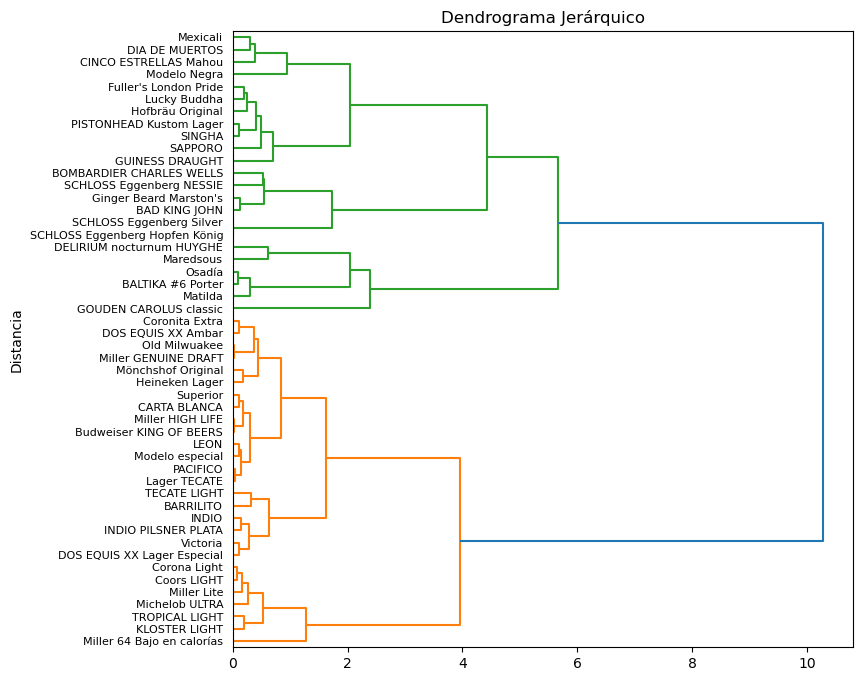

In [9]:
plt.figure(figsize=(8, 8))
plt.title('Dendrograma Jerárquico')
plt.ylabel('Distancia')
dendrogram(uniones, orientation='right', labels=df['Cerveza'].tolist())
plt.show()

Las líneas horizontales representan distancias, mientras que las líneas verticales sirven para unir las observaciones. A partir de este gráfico podemos definir los clusters (en diferente color).

El dendrogarma creado con *scipy* permite agregar un parámetro *color_threshold* para separar los grupos.

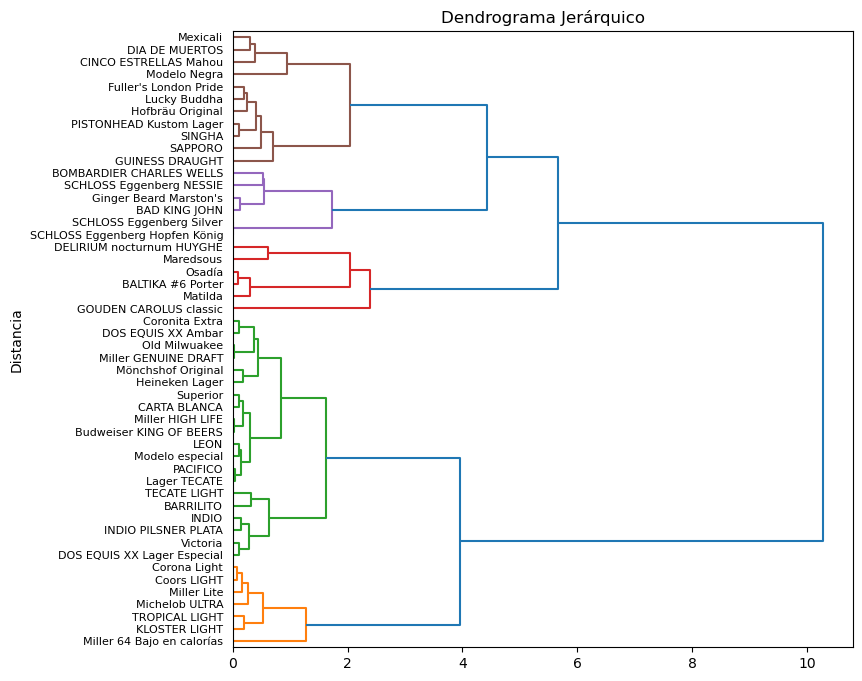

In [10]:
plt.figure(figsize=(8, 8))
plt.title('Dendrograma Jerárquico')
plt.ylabel('Distancia')
dendrogram(uniones, orientation='right', color_threshold=3, labels=df['Cerveza'].tolist())
plt.show()

## Práctica 2: Método de k-medias

Repetiremos el ejercicio utilizando el método jerárquico. El algoritmo de este método no está basado en distancias sino en la variación dentro de los conglomerados, por lo tanto, no se requiere establecer una medida de distancia. El proceso inicia asignando aleatoriamente los elementos a cierto número de conglomerados. Los elementos son sucesivamente reasignados a otros conglomerados para minimizar la variación dentro de cada conglomerado.

El método de k-medias se considera superior a los métodos jerárquicos (debido a que es menos afectado por valores atípicos) y es más conveniente para muestras grandes. Es recomendable utilizarlo sólo con variables cuantitativas o en algunos casos con variables ordinales.  El inconveniente principal es que se debe especificar cuántos conglomerados se van a utilizar, por ello, muchos investigadores recomiendan previamente utilizar el método jerárquico

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Estandarizar variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

En este procedimiento se establece el número de grupos o *clusters* (k). Posteriomente
1. Se crean k "centros" en ubicaciones aleatorias.
2. Para cada observación:
    - Se calcula la distancia a los k centros
    - La observación es asignada al grupo con el centro más cercano.
3. Los centros se mueven al centro de su respectivo grupo.
4. Los pasos 2 y 3 se repiten hasta que no existan cambios en la pertenencia.

El método de k-medias es apropiado cuando se asume que los grupos tienen forma convexa (p. ej. círculo) y tamaños similares. Si no es el caso, conviene explorar otras metodologías para el análisis de conglomerados. 

Utilizaremos la función de k-means en scikit-learn. El parámetro más importante es *n_clusters* que indica el número de grupos (k). Otro parámetro es *n_jobs=-1* para utilizar todos los núcleos del procesador. 

In [13]:
k = 2
# Crear modelo
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
# Ajustar modelo
model = kmeans.fit(X_std)

C:\Users\adanr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Con `.labels_` se obtiene la clase pronosticada de cada observación, y con `.cluster_centers_` se puede encontrar el centro de cada grupo

In [14]:
cluster = model.labels_
centroids = model.cluster_centers_

Conviertiendo el array `centroids` a un dataframe (*¿Cómo interpretas los centroides?*)

In [20]:
df_centroids = pd.DataFrame(centroids, columns = X.columns)
df_centroids['Cluster Name'] = [f"Segmento {i+1}" for i in range(len(df_centroids))]
df_centroids

,Calorias,Costo100ml,Cluster Name
0,-0.384967,-0.461469,Segmento 1
1,1.219063,1.461319,Segmento 2


**Opcional**: Como solamente estamos usando dos variables podríamos graficarlo en un plano:
- Creamos un *bucle* para cada grupo `for i in range (k)`,
- Identificamos las observaciones de cada grupo y las seleccionamos: `cluster_i = np.where(cluster==i)`
- Hacemos un diagrama de dispersión `plt.scatter(X_std[cluster_i,0], X_std[cluster_i,1]`
- Ubicamos el centroide `plt.scatter(centroids[:,0],centroids[:,-1], marker='*', s=200`

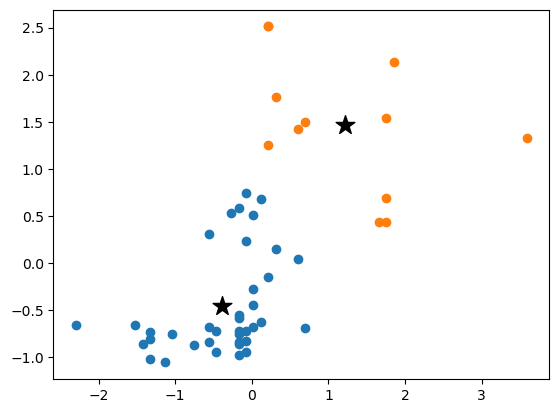

In [21]:
for i in np.unique(cluster):
    plt.scatter(X_std[cluster == i, 0], X_std[cluster == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k')
plt.show()

*Medida de silueta*

La medida de silueta de cohesión y separación es una medida de bondad de ajuste. Un valor menor a 0.20 indica una mala calidad de la solución, un valor superior a 0.5 indica una buena solución.

In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_std, cluster) #X_std son los datos y 'cluster' la asignación
print('Medida de silueta:', score)

Medida de silueta: 0.5605098804443387


*Método del codo*

Algunos utilizan el método del codo (*elbow method*). En este método se calcula la *inercia* en diferentes valores de *k*. La inercia es la suma de las distancias al cuadrado de cada objeto del cluster a su centroide. Tras graficar estos valores, el punto en el cual cambia la tendencia corresponderá al número apropiado de grupos.

C:\Users\adanr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adanr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adanr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adanr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

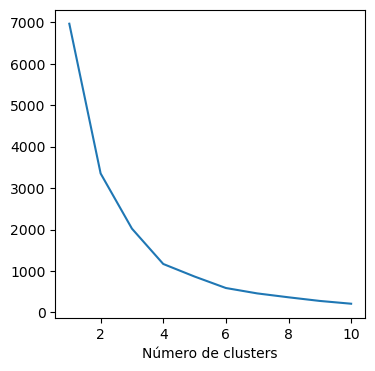

In [18]:
wss = [] #wss, del inglés Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Crear gráfico
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), wss)
plt.xlabel('Número de clusters')
plt.show()

In [19]:
df['Segmento'] = cluster
df.sample(5)

,Cerveza,Tipo,Calorias,Alcohol,Contenido,Costo100ml,Pais,Origen,Segmento
3,INDIO PILSNER PLATA,Cerveza ámbar,34,4.18,473,3.17,México,Nacional,0
22,Miller GENUINE DRAFT,Cerveza clara,38,4.55,355,4.65,Estados Unidos,Importada,0
34,Mexicali,Cerveza ámbar,42,4.92,330,7.12,México,Nacional,0
48,TROPICAL LIGHT,Cerveza clara,28,3.20,355,1.97,México,Nacional,0
28,Heineken Lager,Cerveza clara,40,4.85,250,5.40,México,Nacional,0


Ejemplo de un reporte de resultados (de otro caso)
>Se realizó un análisis de conglomerados mediante el algoritmo k-medias (k-means) con el propósito de segmentar a los clientes de una tienda en línea en función de sus comportamientos de compra.
>
>Las variables utilizadas incluyeron: frecuencia de compra mensual, monto promedio por compra, número de categorías distintas adquiridas, y nivel de satisfacción reportado (escala de 1 a 10). Dado que las variables se encuentran en diferentes escalas, se procedió a estandarizarlas mediante la transformación z-score antes del análisis.
>
>Para determinar el número óptimo de grupos, se calculó el índice de silueta para valores de k entre 2 y 6. El valor más alto del índice se obtuvo con k = 3 (índice de silueta promedio = 0.51), lo que indica una estructura de conglomerados razonablemente bien definida.
>
>El análisis identificó tres segmentos de clientes:
>- Cluster 1 (35%): compradores frecuentes y altamente satisfechos, con gasto medio-alto y variedad de productos; perfil ideal para programas de lealtad.
>- Cluster 2 (40%): compradores ocasionales con bajo gasto y satisfacción moderada; susceptibles a estímulos promocionales.
>- Cluster 3 (25%): clientes de alto gasto pero baja frecuencia y baja satisfacción; pueden requerir intervenciones postventa o atención personalizada.
Los resultados del análisis permitirán diseñar estrategias diferenciadas de marketing, con mensajes, promociones y ofertas alineadas a las características de cada segmento.”


## Preguntas de autoevaluación

**Pregunta 1**. En una empresa de retail, se están explorando diferentes métodos para segmentar a los clientes en grupos con características similares. ¿En cuál de los siguientes escenarios es más apropiado utilizar el método de k-medias (k-means) en lugar del método de clustering jerárquico?
Opciones:

A) La empresa tiene un pequeño número de clientes (menos de 100) y quiere visualizar la jerarquía completa de agrupaciones posibles, desde un único grupo hasta cada cliente en su propio grupo.

B) La empresa tiene una gran cantidad de datos de clientes (más de 10,000) y busca crear rápidamente un número fijo de segmentos, optimizando la homogeneidad dentro de cada grupo.

C) La empresa no tiene claro cuántos segmentos debe crear y quiere probar diferentes criterios de enlace para determinar la estructura más adecuada, explorando la posibilidad de subgrupos dentro de grupos.

**Pregunta 2**. Una empresa de marketing digital está desarrollando una estrategia para personalizar campañas publicitarias según el comportamiento de los usuarios en su plataforma. Han realizado un análisis de clustering para segmentar a los usuarios en diferentes grupos, pero ahora necesitan determinar cuántos segmentos utilizar para obtener la mejor separación entre los grupos. Entre las siguientes métricas, ¿cuál es la más útil para evaluar la calidad de los clusters y ayudar a definir el número óptimo de segmentos?

A) Distancia euclidiana

B) Coeficiente de correlación

C) Medida de silueta
